In [1]:
%matplotlib inline

In [2]:
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [3]:
infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

uwind = iris.load_cube(infile, 'x_wind')
vwind = iris.load_cube(infile, 'y_wind')

uwind.convert_units('knot')
vwind.convert_units('knot')

ulon = uwind.coord('longitude')
vlon = vwind.coord('longitude')

# The longitude points go from 180 to 540, so subtract 360 from them
ulon.points = ulon.points - 360.0
vlon.points = vlon.points - 360.0

# Create a cube containing the wind speed
windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
windspeed.rename('windspeed')
windspeed.convert_units('knot')

x = ulon.points
y = uwind.coord('latitude').points
u = uwind.data
v = vwind.data

# Set up axes to show the lake
lakes = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',
                                  facecolor='none')

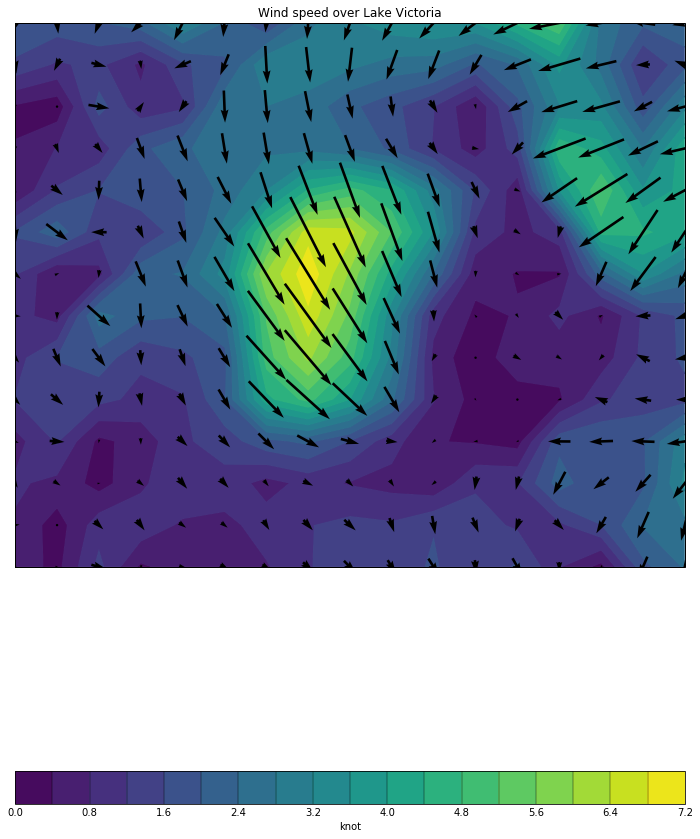

In [4]:
plt.figure(figsize=(12, 25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(lakes)

# Get the coordinate reference system used by the data
transform = ulon.coord_system.as_cartopy_projection()

# Plot the wind speed as a contour plot
qplt.contourf(windspeed, 20)

# Add arrows to show the wind vectors
plt.quiver(x, y, u, v, pivot='middle', transform=transform)

plt.title("Wind speed over Lake Victoria")
qplt.show()

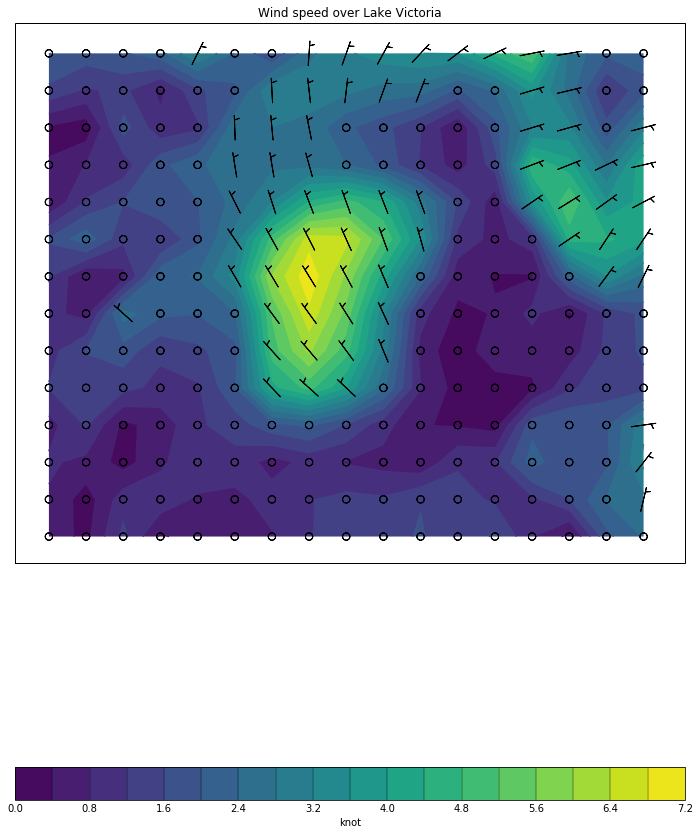

In [5]:
plt.figure(figsize=(12, 25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(lakes)

# Get the coordinate reference system used by the data
transform = ulon.coord_system.as_cartopy_projection()

# Plot the wind speed as a contour plot
qplt.contourf(windspeed, 20)

# Add arrows to show the wind vectors
plt.barbs(x, y, u, v, pivot='middle', transform=transform)

plt.title("Wind speed over Lake Victoria")
qplt.show()


/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


max speed 7.106599807739258


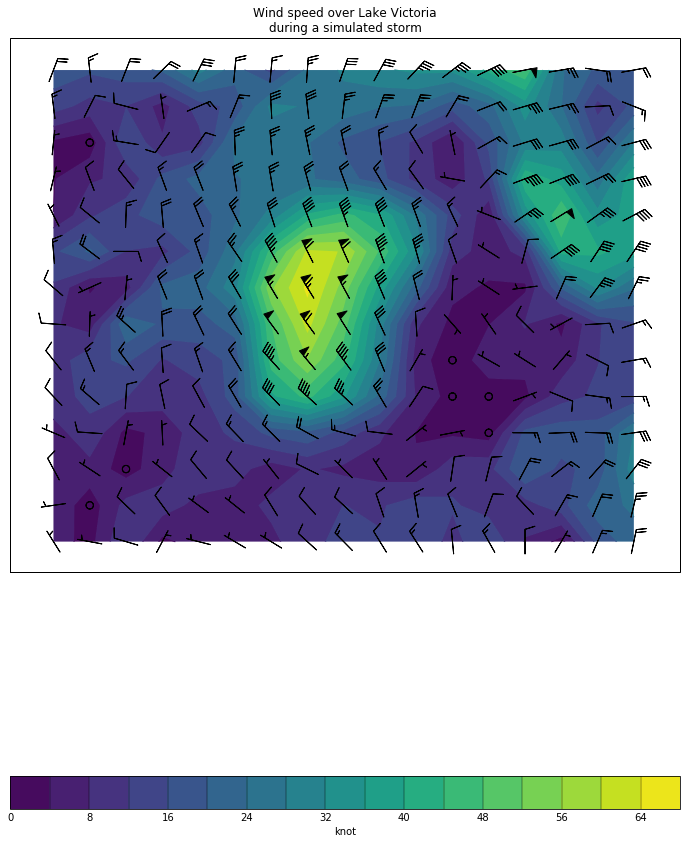

In [11]:
infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

uwind = iris.load_cube(infile, 'x_wind')
vwind = iris.load_cube(infile, 'y_wind')

uwind.convert_units('knot')
vwind.convert_units('knot')

# To illustrate the full range of barbs scale the wind speed up to pretend 
# that a storm is passing over
wibble = (uwind ** 2 + vwind ** 2) ** 0.5
wibble.rename('windspeed')
wibble.convert_units('knot')
max_uspeed_south = abs(wibble.collapsed(('latitude', 'longitude'), iris.analysis.MAX).data)
max_desired = 65

print(f'max speed {max_uspeed_south}')
uwind = (uwind / max_uspeed_south) * max_desired
vwind = (vwind / max_uspeed_south) * max_desired

ulon = uwind.coord('longitude')
vlon = vwind.coord('longitude')

# The longitude points go from 180 to 540, so subtract 360 from them
ulon.points = ulon.points - 360.0
vlon.points = vlon.points - 360.0

# Create a cube containing the wind speed
windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
windspeed.rename('windspeed')
windspeed.convert_units('knot')

x = ulon.points
y = uwind.coord('latitude').points
u = uwind.data
v = vwind.data

# Set up axes to show the lake
lakes = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',
                                  facecolor='none')

plt.figure(figsize=(12, 25))
ax = plt.axes(projection=ccrs.PlateCarree())

# Get the coordinate reference system used by the data
transform = ulon.coord_system.as_cartopy_projection()

# Plot the wind speed as a contour plot
qplt.contourf(windspeed, 20)

# Add arrows to show the wind vectors
plt.barbs(x, y, u, v, pivot='middle', transform=transform)

plt.title("Wind speed over Lake Victoria\nduring a simulated storm")
qplt.show()


/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


max speed 7.106599807739258


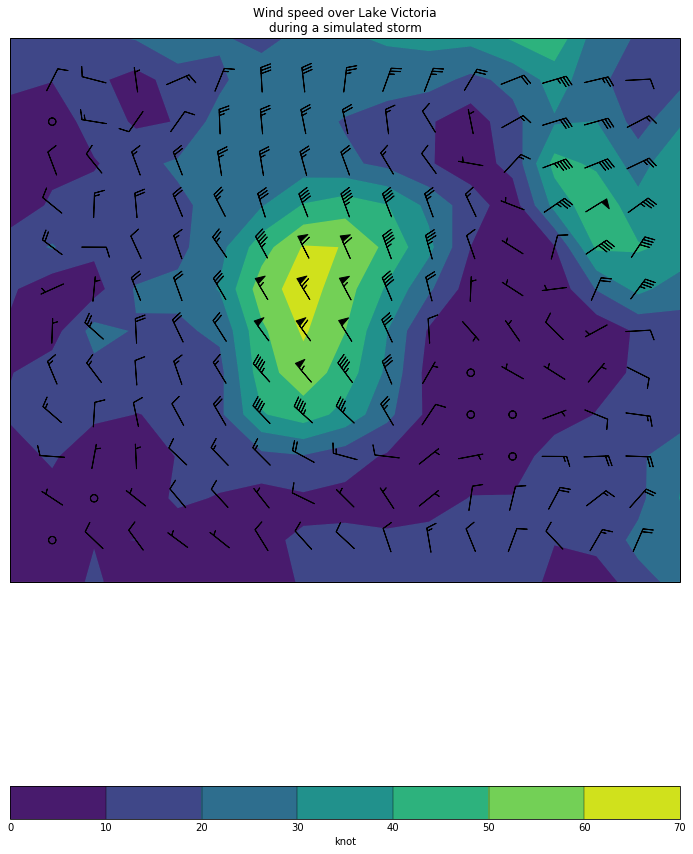

In [33]:
infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

uwind = iris.load_cube(infile, 'x_wind')
vwind = iris.load_cube(infile, 'y_wind')

uwind.convert_units('knot')
vwind.convert_units('knot')

# To illustrate the full range of barbs scale the wind speed up to pretend 
# that a storm is passing over
magnitude = (uwind ** 2 + vwind ** 2) ** 0.5
max_speed = magnitude.collapsed(('latitude', 'longitude'), iris.analysis.MAX).data
max_desired = 65

print(f'max speed {max_speed}')
uwind = (uwind / max_speed) * max_desired
vwind = (vwind / max_speed) * max_desired

# Create a cube containing the wind speed
windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
windspeed.rename('windspeed')
windspeed.convert_units('knot')

plt.figure(figsize=(12, 25))
ax = plt.axes(projection=ccrs.PlateCarree())

# Get the coordinate reference system used by the data
transform = ulon.coord_system.as_cartopy_projection()

qplt.contourf(windspeed)
# Add wind barbs except for the outermost values which will
# overhang the edge of the plot
iplt.barbs(uwind[1:-1, 1:-1], vwind[1:-1, 1:-1], pivot='middle')

plt.title("Wind speed over Lake Victoria\nduring a simulated storm")
qplt.show()


/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


max speed 7.106599807739258


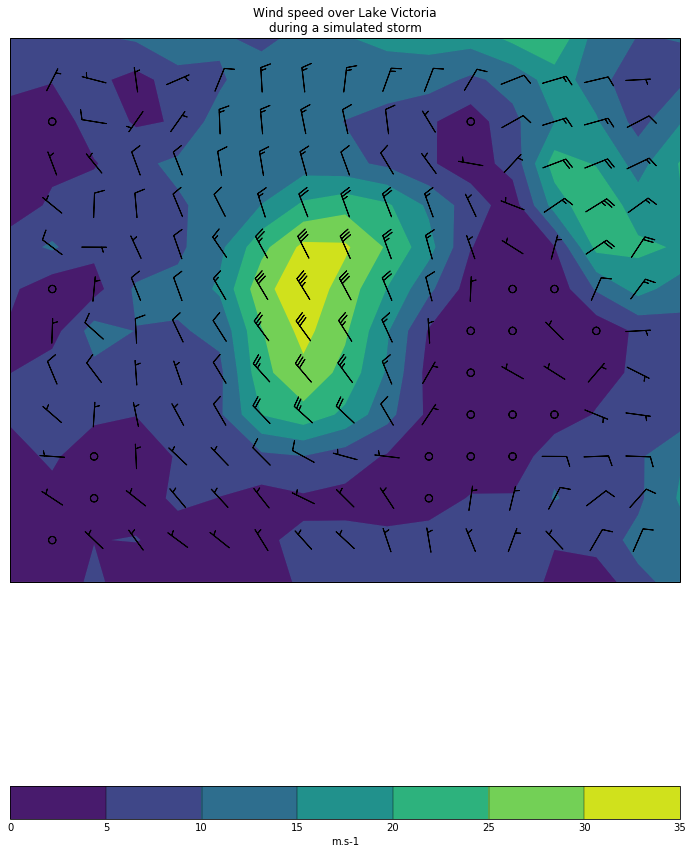

In [24]:
infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

uwind = iris.load_cube(infile, 'x_wind')
vwind = iris.load_cube(infile, 'y_wind')

# To illustrate the full range of barbs scale the wind speed up to pretend 
# that a storm is passing over
magnitude = (uwind ** 2 + vwind ** 2) ** 0.5
magnitude.convert_units('knot')
max_speed = magnitude.collapsed(('latitude', 'longitude'), iris.analysis.MAX).data
max_desired = 65

print(f'max speed {max_speed}')
uwind = (uwind / max_speed) * max_desired
vwind = (vwind / max_speed) * max_desired

# Create a cube containing the wind speed
windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
windspeed.rename('windspeed')

plt.figure(figsize=(12, 25))
ax = plt.axes(projection=ccrs.PlateCarree())

qplt.contourf(windspeed)
# Add wind barbs except for the outermost values which will
# overhang the edge of the plot
iplt.barbs(uwind[1:-1, 1:-1], vwind[1:-1, 1:-1], pivot='middle')

plt.title("Wind speed over Lake Victoria\nduring a simulated storm")
qplt.show()


In [52]:
import numpy as np
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

def find_peak(data, threshold, neighbourhood_size=2):
    """
    Find the peaks in the 2D array data that are above threshold over the
    specified neighbourhood size.
    
    This is based on the algorithm suggested at 
    https://stackoverflow.com/a/22631583

    Args:
   
    * data:
        the 2D array containing the data
        
    * threshold: (float)
        the threshold to find peaks greater than
        
    Kwargs:
    
    * neighbourhood_size: (int)
        the neighbourhood size to pass to 
        :func:`scipy.ndimage.filters.maximum_filter`
    """
    data_max = filters.maximum_filter(data, neighbourhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighbourhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0

    labeled, num_objects = ndimage.label(maxima)
    xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))

    return xy

In [53]:
print(find_peak(windspeed.data, 35, 3))
print

65.0
[[ 4. 14.]]


In [37]:
np.where(windspeed.data.max())

(array([0]),)

In [55]:
print(windspeed[:10, :10])

windspeed / (knot)                  (latitude: 10; longitude: 10)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          forecast_period: 777960.0 hours, bound=(777600.0, 778320.0) hours
          forecast_reference_time: 1859-12-01 00:00:00
          height: 10.0 m
          time: 1949-12-16 00:00:00, bound=(1949-12-01 00:00:00, 1950-01-01 00:00:00)


/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/jseddon/python/iris/lib/iris/coords.py:2108: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


max speed 7.106599807739258


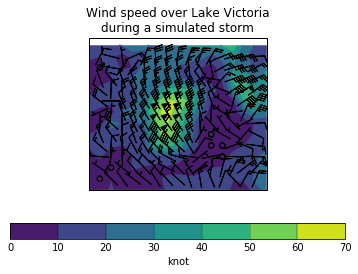

In [61]:
infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

uwind = iris.load_cube(infile, 'x_wind')
vwind = iris.load_cube(infile, 'y_wind')

# uwind = uwind[3:13, 3:13]
# vwind = vwind[3:13, 3:13]

uwind.convert_units('knot')
vwind.convert_units('knot')

# To illustrate the full range of barbs scale the wind speed up to pretend 
# that a storm is passing over
magnitude = (uwind ** 2 + vwind ** 2) ** 0.5
max_speed = magnitude.collapsed(('latitude', 'longitude'), iris.analysis.MAX).data
max_desired = 65

print(f'max speed {max_speed}')
uwind = (uwind / max_speed) * max_desired
vwind = (vwind / max_speed) * max_desired

# Create a cube containing the wind speed
windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
windspeed.rename('windspeed')
windspeed.convert_units('knot')

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Get the coordinate reference system used by the data
transform = ulon.coord_system.as_cartopy_projection()

qplt.contourf(windspeed)
# Add wind barbs except for the outermost values which will
# overhang the edge of the plot
iplt.barbs(uwind[1:-1, 1:-1], vwind[1:-1, 1:-1], pivot='middle', length=6)

plt.title("Wind speed over Lake Victoria\nduring a simulated storm")
qplt.show()
